# 1. Obtain your data

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
%matplotlib inline

In [65]:
url = 'http://www.infrastructure.gc.ca/alt-format/opendata/project-list-liste-de-projets-bil.json?_=1498523395974'
response = requests.get(url)

In [66]:
data = response.json()
data

{'data': [['46916',
   'Haines Junction Lagoon upgrades',
   'Amélioration de la lagune de Haines Junction',
   'CWWF',
   'FEPTEU',
   'Clean Water and Wastewater Fund',
   "Fonds pour l'eau potable et le traitement des eaux usées",
   'Wastewater',
   'Eaux usées',
   'Haines Junction',
   'Haines Junction',
   'yt',
   '2016-06-22',
   '',
   '',
   '3480750',
   '4641000',
   'Haines Junction, Village of',
   "Haines Junction, Village d'",
   '2017-05-01',
   '2018-09-30'],
  ['46925',
   'Ross River Sewage Lagoon',
   'Lagune des eaux usées de Ross River',
   'CWWF',
   'FEPTEU',
   'Clean Water and Wastewater Fund',
   "Fonds pour l'eau potable et le traitement des eaux usées",
   'Wastewater',
   'Eaux usées',
   'Ross River',
   'Ross River',
   'yt',
   '2016-06-22',
   '',
   '',
   '2436000',
   '3248000',
   'Government of Yukon',
   'Gouvernement du Yukon',
   '2016-07-01',
   '2017-11-30'],
  ['46922',
   'Old Crow Lagoon upgrades',
   "Amélioration de la lagune d'Old Cro

In [67]:
data['data'][0]

['46916',
 'Haines Junction Lagoon upgrades',
 'Amélioration de la lagune de Haines Junction',
 'CWWF',
 'FEPTEU',
 'Clean Water and Wastewater Fund',
 "Fonds pour l'eau potable et le traitement des eaux usées",
 'Wastewater',
 'Eaux usées',
 'Haines Junction',
 'Haines Junction',
 'yt',
 '2016-06-22',
 '',
 '',
 '3480750',
 '4641000',
 'Haines Junction, Village of',
 "Haines Junction, Village d'",
 '2017-05-01',
 '2018-09-30']

# 2. write down 1 to 3 central research questions that define what your approach to this data--and how this data can be mapped geographically.

Infrastructure Canada Projects since 2002

I worked for a project during last summer about how to help Canada to become more competitive in terms of attracting highly educated immigrants. One of the pillars of realizing this ambition is building better cities by investing in infrastructure. This is also the focus of the current government.

Central questions: 
    1. Is the weight of the investments for the infrastructure of the secondery cities increasing over years?
        a. Which cities/provinces are doing better on this mission?
        b. Are they completing their project on time?
    2. What kind of infrastructures is each province focusing on?
    3. Has infrastructure investment policy changed after current PM asseumed office?
        a. Federal investment percentage
        b. Focus of categories per province

15 secondery cities I want to focus on:
    1. St. John's (N.L.): 0.27
    2. Guelph (Ont.): 0.26
    3. Québec (Que.): 0.24
    4. Barrie (Ont.): 0.23
    5. Ottawa-Gatineau (Ont.-Que.): 0.21
    6. Calgary (Alta.): 0.16
    7. Winnipeg (Man.): 0.15
    8. Trois-Rivières (Que.): 0.15
    9. Edmonton (Alta.): 0.15
    10. Halifax (N.S.): 0.08
    11. Regina (Sask.): 0.08
    12. Kelowna (B.C.): 0.07
    13. Moncton (N.B.): 0.06
    14. Saskatoon (Sask.): 0.06
    15. Saint John (N.B.): 0.04
    
    ** Selected the top 1-2 cities from each province from the sample of #11-33 cities by population density (unit: thousand people/square kilometers)
    ** Source: Statistics Canada

How this data can be mapped geographically:

The data set has columns 'province' and ‘location’(cities).

# 3. Build a schema for your database

### How many dictionaries/tables will there be? What are the fields that you will use? What fields do you need in order to make aggregations and study the subject? Will there be primary keys, the most important unit of study, that exist the across tables (if you have more than one). Map this out before you build your dictionaries.

My schema is consisted of a list called "data_projects", and within it, I have 12100 dictionaries for each of the projects.

For each of the project I have headers, including: name, program (the federal program name that the project belongs to), category, location(aka. city), province, approved date of construction, forecasted start date of the construction, real start date of the construction, forecasted end date of the construction, real endt date of the construction, federal contribution, total eligible costs, ultimate recipient.

Among all the parameters, I wil focus on: name, category, location, province, approved date of construction, forecasted start date of the construction, real start date of the construction, forecasted end date of the construction, real endt date of the construction, federal contribution, total eligible costs, ultimate recipient.

# 4. Build a dictionary (or multiple dictionaries) of your data.

In [68]:
data_projects = []

for item in data['data']:
    project = {}
    
    project['name'] = item[1]
    project['program'] = item[5]
    project['category'] = item[7]
    project['location'] = item[9]
    project['province'] = item[11]
    project['approved_date'] = item[12]
    project['construction_start_date'] = item[13]
    project['construction_end_date'] = item[14]
    project['federal_contribution'] = item[15]
    project['total_eligible_costs'] = item[16]
    project['ultimate_recipient'] = item[17]
    project['forecasted_construction_start_date'] = item[19]
    project['forecasted_construction_end_date'] = item[20]
    
    data_projects.append(project)

In [69]:
len(data_projects)

12100

In [70]:
df = pd.DataFrame(data_projects)
df.head()

,approved_date,category,construction_end_date,construction_start_date,federal_contribution,forecasted_construction_end_date,forecasted_construction_start_date,location,name,program,province,total_eligible_costs,ultimate_recipient
0,2016-06-22,Wastewater,,,3480750,2018-09-30,2017-05-01,Haines Junction,Haines Junction Lagoon upgrades,Clean Water and Wastewater Fund,yt,4641000,"Haines Junction, Village of"
1,2016-06-22,Wastewater,,,2436000,2017-11-30,2016-07-01,Ross River,Ross River Sewage Lagoon,Clean Water and Wastewater Fund,yt,3248000,Government of Yukon
2,2016-06-22,Wastewater,,,3366750,2018-10-31,2017-07-01,Vuntut Gwitchin First Nation,Old Crow Lagoon upgrades,Clean Water and Wastewater Fund,yt,4489000,Government of Yukon
3,2016-06-22,Drinking Water,,,3442875,2018-10-31,2017-05-01,Dawson City,"Dawson Twin Raw Water Line, Water and Wastewat...",Clean Water and Wastewater Fund,yt,4590500,"Dawson, City of"
4,2016-06-22,Drinking Water,,,187500,2017-08-01,2016-07-01,Carcross/Tagish First Nations,Tagish pipe firehall to water treatment plant,Clean Water and Wastewater Fund,yt,250000,Government of Yukon


In [71]:
df.to_csv("final_project_canada_infrastructure.csv", index=False)

# 5. Run at least five aggregations. 

### Because this is an individual project it is up to you to decide what aggregations to run--if aggregations are not necessarily part of this project, then execute searches through your database that result in specific useful outputs that can be displayed on the map.

In [72]:
df = pd.read_csv("final_project_canada_infrastructure.csv")
df['province'].value_counts()

on    5015
qc    1895
bc    1143
sk     856
ab     723
ns     529
nl     523
mb     462
nb     433
pe     270
nt     122
yt      94
nu      35
Name: province, dtype: int64

In [73]:
replacements = { 
    'on': 'Ontario',
    'qc': 'Quebec',
    'bc': 'British Columbia',
    'sk': 'Saskatchewan',
    'ab': 'Alberta',
    'ns': 'Nova Scotia',
    'nl': 'Newfoundland and Labrador',
    'mb': 'Manitoba',
    'nb': 'New Brunswick',
    'pe': 'Prince Edward Island',
    'nt': 'Northwest Territories',
    'yt': 'Yukon',
    'nu': 'Nunavut'
}

In [74]:
df['province'].replace(replacements, inplace=True)
df.head()

,approved_date,category,construction_end_date,construction_start_date,federal_contribution,forecasted_construction_end_date,forecasted_construction_start_date,location,name,program,province,total_eligible_costs,ultimate_recipient
0,2016-06-22,Wastewater,NaN,NaN,3480750.0,2018-09-30,2017-05-01,Haines Junction,Haines Junction Lagoon upgrades,Clean Water and Wastewater Fund,Yukon,4641000.0,"Haines Junction, Village of"
1,2016-06-22,Wastewater,NaN,NaN,2436000.0,2017-11-30,2016-07-01,Ross River,Ross River Sewage Lagoon,Clean Water and Wastewater Fund,Yukon,3248000.0,Government of Yukon
2,2016-06-22,Wastewater,NaN,NaN,3366750.0,2018-10-31,2017-07-01,Vuntut Gwitchin First Nation,Old Crow Lagoon upgrades,Clean Water and Wastewater Fund,Yukon,4489000.0,Government of Yukon
3,2016-06-22,Drinking Water,NaN,NaN,3442875.0,2018-10-31,2017-05-01,Dawson City,"Dawson Twin Raw Water Line, Water and Wastewat...",Clean Water and Wastewater Fund,Yukon,4590500.0,"Dawson, City of"
4,2016-06-22,Drinking Water,NaN,NaN,187500.0,2017-08-01,2016-07-01,Carcross/Tagish First Nations,Tagish pipe firehall to water treatment plant,Clean Water and Wastewater Fund,Yukon,250000.0,Government of Yukon


In [75]:
df.dtypes

approved_date                          object
category                               object
construction_end_date                  object
construction_start_date                object
federal_contribution                  float64
forecasted_construction_end_date       object
forecasted_construction_start_date     object
location                               object
name                                   object
program                                object
province                               object
total_eligible_costs                  float64
ultimate_recipient                     object
dtype: object

### 1. How project focuses vary among different provinces?

In [76]:
df.groupby('province')['category'].value_counts().groupby(level=0).head(1)

province                   category          
Alberta                    Highways and Roads     258
British Columbia           Highways and Roads     309
Manitoba                   Drinking Water         102
New Brunswick              Wastewater             149
Newfoundland and Labrador  Drinking Water         253
Northwest Territories      Wastewater              29
Nova Scotia                Wastewater             160
Nunavut                    Recreation              10
Ontario                    Highways and Roads    1227
Prince Edward Island       Wastewater             112
Quebec                     Wastewater             818
Saskatchewan               Highways and Roads     263
Yukon                      Highways and Roads      32
Name: category, dtype: int64

### 2. What kind of projects takes the longest time? 

In [77]:
pd.set_option('display.max_rows', 3000)
df.head(1000)

,approved_date,category,construction_end_date,construction_start_date,federal_contribution,forecasted_construction_end_date,forecasted_construction_start_date,location,name,program,province,total_eligible_costs,ultimate_recipient
0,2016-06-22,Wastewater,NaN,NaN,3.480750e+06,2018-09-30,2017-05-01,Haines Junction,Haines Junction Lagoon upgrades,Clean Water and Wastewater Fund,Yukon,4.641000e+06,"Haines Junction, Village of"
1,2016-06-22,Wastewater,NaN,NaN,2.436000e+06,2017-11-30,2016-07-01,Ross River,Ross River Sewage Lagoon,Clean Water and Wastewater Fund,Yukon,3.248000e+06,Government of Yukon
2,2016-06-22,Wastewater,NaN,NaN,3.366750e+06,2018-10-31,2017-07-01,Vuntut Gwitchin First Nation,Old Crow Lagoon upgrades,Clean Water and Wastewater Fund,Yukon,4.489000e+06,Government of Yukon
3,2016-06-22,Drinking Water,NaN,NaN,3.442875e+06,2018-10-31,2017-05-01,Dawson City,"Dawson Twin Raw Water Line, Water and Wastewat...",Clean Water and Wastewater Fund,Yukon,4.590500e+06,"Dawson, City of"
4,2016-06-22,Drinking Water,NaN,NaN,1.875000e+05,2017-08-01,2016-07-01,Carcross/Tagish First Nations,Tagish pipe firehall to water treatment plant,Clean Water and Wastewater Fund,Yukon,2.500000e+05,Government of Yukon
5,2016-06-22,Drinking Water,NaN,NaN,6.075000e+06,2018-10-31,2017-07-01,Whitehorse,Whitehorse Downtown Upgrades,Clean Water and Wastewater Fund,Yukon,8.100000e+06,"Whitehorse, City of"
6,2016-06-22,Wastewater,NaN,NaN,9.000000e+05,2018-09-30,2018-05-01,Watson Lake,Watson Lake Forcemain & Gravity Trunk,Clean Water and Wastewater Fund,Yukon,1.200000e+06,"Watson Lake, Town of"
7,2016-06-22,Drinking Water,NaN,NaN,2.344500e+06,2018-12-31,2017-05-01,Watson Lake,Watson Lake Reservoir,Clean Water and Wastewater Fund,Yukon,3.126000e+06,"Watson Lake, Town of"
8,2016-06-22,Drinking Water,NaN,NaN,1.063125e+06,2018-10-31,2017-07-15,Marsh Lake,Marsh Lake Water Treatment Plant Replacement,Clean Water and Wastewater Fund,Yukon,1.417500e+06,Government of Yukon
9,2016-06-22,Drinking Water,NaN,NaN,3.459375e+06,2018-10-31,2017-04-01,Faro,Faro pumphouses rehabilitation and reservoir u...,Clean Water and Wastewater Fund,Yukon,4.612500e+06,"Faro, Town of"


In [78]:
df_complete = df[df['construction_start_date'].notnull() & df['construction_end_date'].notnull()]

In [79]:
df_complete['construction_start_dt'] = pd.to_datetime(df_complete['construction_start_date'])
df_complete['construction_end_dt'] = pd.to_datetime(df_complete['construction_end_date'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
df['construction_start_dt'] = pd.to_datetime(df['construction_start_date'])
df['construction_end_dt'] = pd.to_datetime(df['construction_end_date'])

In [81]:
df.head(100)

,approved_date,category,construction_end_date,construction_start_date,federal_contribution,forecasted_construction_end_date,forecasted_construction_start_date,location,name,program,province,total_eligible_costs,ultimate_recipient,construction_start_dt,construction_end_dt
0,2016-06-22,Wastewater,NaN,NaN,3480750.00,2018-09-30,2017-05-01,Haines Junction,Haines Junction Lagoon upgrades,Clean Water and Wastewater Fund,Yukon,4641000.00,"Haines Junction, Village of",NaT,NaT
1,2016-06-22,Wastewater,NaN,NaN,2436000.00,2017-11-30,2016-07-01,Ross River,Ross River Sewage Lagoon,Clean Water and Wastewater Fund,Yukon,3248000.00,Government of Yukon,NaT,NaT
2,2016-06-22,Wastewater,NaN,NaN,3366750.00,2018-10-31,2017-07-01,Vuntut Gwitchin First Nation,Old Crow Lagoon upgrades,Clean Water and Wastewater Fund,Yukon,4489000.00,Government of Yukon,NaT,NaT
3,2016-06-22,Drinking Water,NaN,NaN,3442875.00,2018-10-31,2017-05-01,Dawson City,"Dawson Twin Raw Water Line, Water and Wastewat...",Clean Water and Wastewater Fund,Yukon,4590500.00,"Dawson, City of",NaT,NaT
4,2016-06-22,Drinking Water,NaN,NaN,187500.00,2017-08-01,2016-07-01,Carcross/Tagish First Nations,Tagish pipe firehall to water treatment plant,Clean Water and Wastewater Fund,Yukon,250000.00,Government of Yukon,NaT,NaT
5,2016-06-22,Drinking Water,NaN,NaN,6075000.00,2018-10-31,2017-07-01,Whitehorse,Whitehorse Downtown Upgrades,Clean Water and Wastewater Fund,Yukon,8100000.00,"Whitehorse, City of",NaT,NaT
6,2016-06-22,Wastewater,NaN,NaN,900000.00,2018-09-30,2018-05-01,Watson Lake,Watson Lake Forcemain & Gravity Trunk,Clean Water and Wastewater Fund,Yukon,1200000.00,"Watson Lake, Town of",NaT,NaT
7,2016-06-22,Drinking Water,NaN,NaN,2344500.00,2018-12-31,2017-05-01,Watson Lake,Watson Lake Reservoir,Clean Water and Wastewater Fund,Yukon,3126000.00,"Watson Lake, Town of",NaT,NaT
8,2016-06-22,Drinking Water,NaN,NaN,1063125.00,2018-10-31,2017-07-15,Marsh Lake,Marsh Lake Water Treatment Plant Replacement,Clean Water and Wastewater Fund,Yukon,1417500.00,Government of Yukon,NaT,NaT
9,2016-06-22,Drinking Water,NaN,NaN,3459375.00,2018-10-31,2017-04-01,Faro,Faro pumphouses rehabilitation and reservoir u...,Clean Water and Wastewater Fund,Yukon,4612500.00,"Faro, Town of",NaT,NaT


In [82]:
# df['construction_start_dt'].replace(pd.NaT, '1900-01-01', inplace=True)
# df['construction_end_dt'].replace(pd.NaT, '1900-01-01', inplace=True)

In [83]:
def days_between(row):
    date1 = datetime.strptime(row['construction_start_date'],"%Y-%m-%d")
    date2 = datetime.strptime(row['construction_end_date'],"%Y-%m-%d")
    return (date2 - date1).days

In [84]:
df['complete_time'] = df_complete.apply(days_between, axis=1)
df_complete['complete_time'] = df_complete.apply(days_between, axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


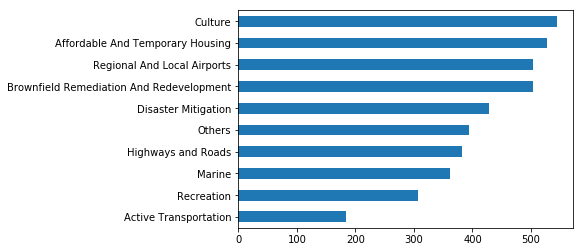

In [85]:
ax = df_complete.groupby('category')['complete_time'].mean().sort_values(ascending=True).head(10).plot(kind='barh', y='category')
ax.set_ylabel('')

## 2. What kind of projects gets the most funds?

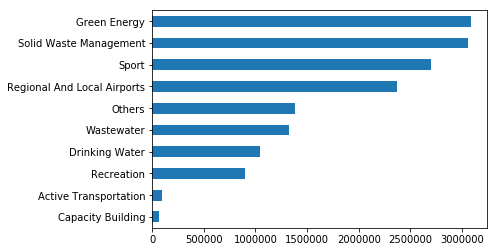

In [86]:
ax = df.groupby('category')['federal_contribution'].mean().sort_values(ascending=True).head(10).plot(kind='barh', x='category')
ax.set_ylabel('')

## 3. Top 5 cities in each province that gets the most federal funds?

In [194]:
df.groupby(['province', 'location'])['federal_contribution'].sum().groupby(level=0).nlargest(5)

province                   province                   location                                                                                                                                        
Alberta                    Alberta                    Calgary                                                                                                                                             3.914207e+08
                                                      Edmonton                                                                                                                                            3.731963e+08
                                                      Athabasca County; Lakeland County                                                                                                                   1.500000e+08
                                                      Edmonton; Strathcona County                                                                           

In [88]:
df.groupby(['province', 'location'])['federal_contribution'].sum().nlargest(15)

province          location                                                                                                                                                                                        
Ontario           Ottawa                                                                                                                                                                                              2.213419e+09
                  Toronto                                                                                                                                                                                             1.268115e+09
Alberta           Calgary                                                                                                                                                                                             1.215575e+09
                  Edmonton                                                                                  

## 4. Seasonal pattern of construction?

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


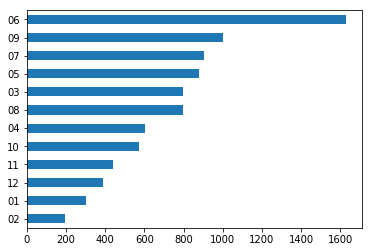

In [195]:
df_complete['construction_start_date'].str.extract('\d\d\d\d-(\d\d)-\d\d').value_counts().sort_values().plot(kind='barh')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


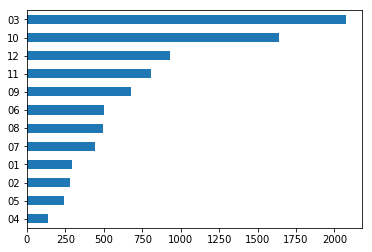

In [196]:
df_complete['construction_end_date'].str.extract('\d\d\d\d-(\d\d)-\d\d').value_counts().sort_values().plot(kind='barh')

## 5. The average time between approved data and construction start date? between estimated construction start date and real start date?

In [197]:
df['approved_date'] = pd.to_datetime(df.approved_date, format="%Y-%m-%d")
df['construction_start_date'] = pd.to_datetime(df.construction_start_date, format="%Y-%m-%d")
df['forecasted_construction_start_date'] = pd.to_datetime(df.forecasted_construction_start_date, format="%Y-%m-%d")

In [198]:
df['set_up_time'] = df['construction_start_date'] - df['approved_date']

In [95]:
# def days_start(row):
#     date1 = datetime.strptime(row['approved_date'],"%Y-%m-%d")
#     date2 = datetime.strptime(row['construction_start_date'],"%Y-%m-%d")
#     return (date2 - date1).days

In [200]:
df['set_up_time'].value_counts()

0 days        1102
309 days       477
-231 days      151
-7 days        147
8 days         131
-233 days       71
15 days         70
197 days        56
-156 days       52
287 days        48
-386 days       48
25 days         47
42 days         43
11 days         43
16 days         42
218 days        42
4 days          41
248 days        40
29 days         39
-234 days       38
220 days        36
22 days         34
259 days        32
108 days        32
227 days        30
28 days         30
-21 days        29
273 days        29
5 days          29
14 days         29
312 days        28
90 days         28
10 days         28
19 days         28
23 days         28
-14 days        28
21 days         28
77 days         27
39 days         27
54 days         26
140 days        26
-18 days        25
68 days         25
-527 days       24
24 days         24
355 days        24
91 days         23
63 days         23
-441 days       23
258 days        22
26 days         22
100 days        22
59 days     

In [201]:
df['set_up_time'] = df['set_up_time'].dt.days.astype(int)

In [202]:
df.dtypes

approved_date                          datetime64[ns]
category                                       object
construction_end_date                          object
construction_start_date                datetime64[ns]
federal_contribution                          float64
forecasted_construction_end_date               object
forecasted_construction_start_date     datetime64[ns]
location                                       object
name                                           object
program                                        object
province                                       object
total_eligible_costs                          float64
ultimate_recipient                             object
construction_start_dt                  datetime64[ns]
construction_end_dt                    datetime64[ns]
complete_time                                 float64
set_up_time                                     int64
delay                                 timedelta64[ns]
year                        

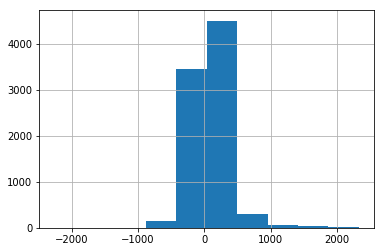

In [203]:
df['set_up_time'].hist()

In [204]:
start_earlier_than_approved = (df[df['set_up_time'].astype(int) < 0]['approved_date'].count()) / df[df['set_up_time'].astype(int) != None]['approved_date'].count() * 100

In [205]:
print(round(start_earlier_than_approved), 'percent of the projects started earlier than their approved dates.')

18.0 percent of the projects started earlier than their approved dates.


In [206]:
df_forecasted = df[df['forecasted_construction_start_date'].notnull()]

In [210]:
df_forecasted['delay'] = df_forecasted['construction_start_date'] - df_forecasted['forecasted_construction_start_date']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# def delay_time(row):
#     date1 = datetime.strptime(row['forecasted_construction_start_date'],"%Y-%m-%d")
#     date2 = datetime.strptime(row['construction_start_date'],"%Y-%m-%d")
#     return (date2 - date1).days

In [212]:
df_forecasted['delay'] = df_forecasted['delay'].dt.days.astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


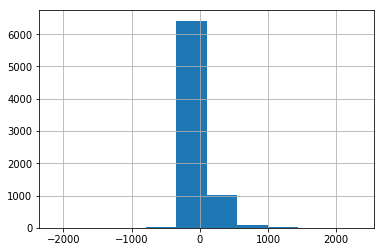

In [216]:
df_forecasted['delay'].hist()

In [217]:
started_late = (df_forecasted[df_forecasted['delay'].astype(int) < 0]['approved_date'].count()) / df_forecasted[df_forecasted['delay'].astype(int) != None]['approved_date'].count() * 100

In [218]:
print(round(started_late), 'percent of their projects started later than their estimated start dates.')

20.0 percent of their projects started later than their estimated start dates.


### 6. Any changes after current PM took his office?

In [ ]:
# Justin Treadue assumed office on November 4, 2015. Source: https://en.wikipedia.org/wiki/Justin_Trudeau

In [219]:
df['year'] = df_complete['approved_date'].str.extract('(\d\d\d\d)-\d\d-\d\d')
df_complete['year'] = df_complete['approved_date'].str.extract('(\d\d\d\d)-\d\d-\d\d')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [220]:
df['year'].value_counts()

2009    4158
2010    1719
2007     873
2006     528
2005     333
2008     247
2015     235
2011     210
2014     128
2013      30
2016      22
2012      14
2004      13
2003       4
2002       2
Name: year, dtype: int64

In [221]:
df.dropna(subset=['year'], inplace=True)

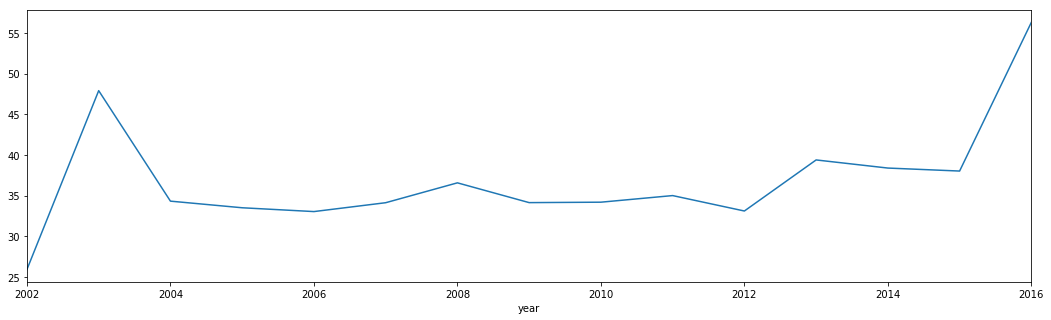

In [222]:
((df.groupby('year')['federal_contribution'].sum()) / (df.groupby('year')['total_eligible_costs'].sum()) * 100).plot(figsize=(18,5))

In [223]:
federal_percent_2014 = (df[df['year'] == '2014']['federal_contribution'].sum()) / df[df['year'] == '2014']['total_eligible_costs'].sum() * 100

In [224]:
federal_percent_2016 = (df[df['year'] == '2016']['federal_contribution'].sum()) / df[df['year'] == '2016']['total_eligible_costs'].sum() * 100

In [225]:
print('The weight of federal contribution in the total eligible costs has increased from', round(federal_percent_2014), '% in 2014 to', round(federal_percent_2016), '% in 2016.')

The weight of federal contribution in the total eligible costs has increased from 38.0 % in 2014 to 56.0 % in 2016.
